In [3]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
import sklearn.datasets

In [4]:
x,y = sklearn.datasets.make_moons(200,noise=0.20) # 200 is the no. of datapoints we want !!

In [6]:
print(x.shape,y.shape) # x are the coordinates of the point and y is binary label

(200, 2) (200,)


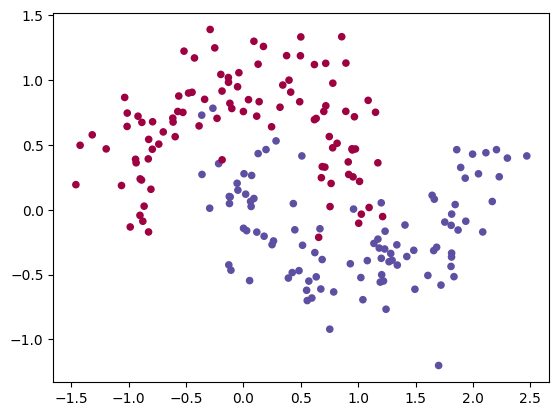

In [12]:
plt.scatter(x[:,0],x[:,1],c=y,s=20,cmap=plt.cm.Spectral)
plt.show()

In [13]:
x = torch.tensor(x).float()

In [14]:
y = torch.tensor(y).long()

In [15]:
print(x.dtype,y.dtype)

torch.float32 torch.int64


In [16]:
y.unique()

tensor([0, 1])

In [17]:
class FeedForward(nn.Module) : 
    def __init__(self,input_neurons,hidden_neurons,output_neurons) :
        super(FeedForward,self).__init__()
        self.hidden = nn.Linear(input_neurons,hidden_neurons)
        self.out = nn.Linear(hidden_neurons,output_neurons)
    def forward(self,x) :
        x = self.hidden(x)
        x = F.relu(x)
        x = self.out(x)
        return x

In [20]:
network = FeedForward(input_neurons=2, hidden_neurons=50, output_neurons=2)
optimizer = torch.optim.SGD(network.parameters(), lr = 0.02)
lossfn = nn.CrossEntropyLoss() # we are using this loss because we cannot use BCE because for that output labels should be of 1 dimension
# also softmax comes hand in hand with CE loss !!!!

In [22]:
epochs = 1000
for e in range(epochs) : 
    network(x)
    loss = lossfn(out,y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if e%100 == 0 : 
        # this will show the learning process after every 100 epoch !
        max_value, pred = torch.max(out,1)
        pred_y = pred.data.numpy()
        target_y = y.data.numpy()
        plt.scatter(x.data.numpy()[:,0],x.data.numpy()[:,1],c=pred_y, lw = 0)
        acc = (pred_y == target_y).sum()/target_y.size
        plt.text(3,-1,f"acc = {acc:.2f}",fontdict = {"size":14})
        plt.pause(0.1)
plt.show()

NameError: name 'out' is not defined